# 03. Pytorch Computer Vision

Reference: https://www.learnpytorch.io/03_pytorch_computer_vision/ 

- [torchvision](https://pytorch.org/vision/stable/index.html) - Contains datasets, model architectures and image transformations often used for computer vision problems.
- [torchvision.datasets](https://pytorch.org/vision/stable/datasets.html) - get datasets and data loading functions for computer vision
- [torchvision.models](https://pytorch.org/vision/stable/models.html) - contains pretrained models for computer vision
- [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html) - operations to apply on images such as transforms, conversions, etc.
- [torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) - Base dataset class for PyTorch
- [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) - Creates a Python iterable over a dataset

In [1]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu117
0.15.2+cu117


In [2]:
# Getting a dataset

train_data = datasets.FashionMNIST(root='data', 
                                train=True, 
                                download=True, 
                                transform=ToTensor(), # convert the image to a PyTorch tensor
                                target_transform=None) # transform the label into a tensor

test_data = datasets.FashionMNIST(root='data',
                                train=False,
                                download=True,
                                transform=ToTensor(),
                                target_transform=None)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
print(f"Image shape: {image.shape}, Label: {label}")

Image shape: torch.Size([1, 28, 28]), Label: 9


In [5]:
class_names = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

(-0.5, 27.5, 27.5, -0.5)

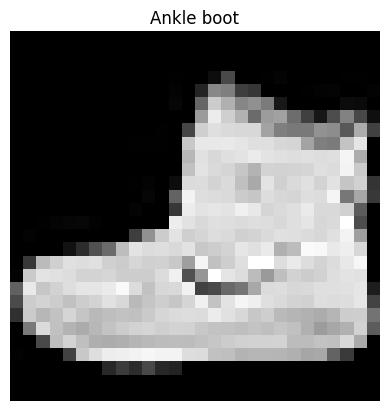

In [7]:
plt.imshow(image.squeeze(), cmap='gray') # Need to squeeze the image to remove the channel dimension
plt.title(f"{class_names[label]}")
plt.axis('off')

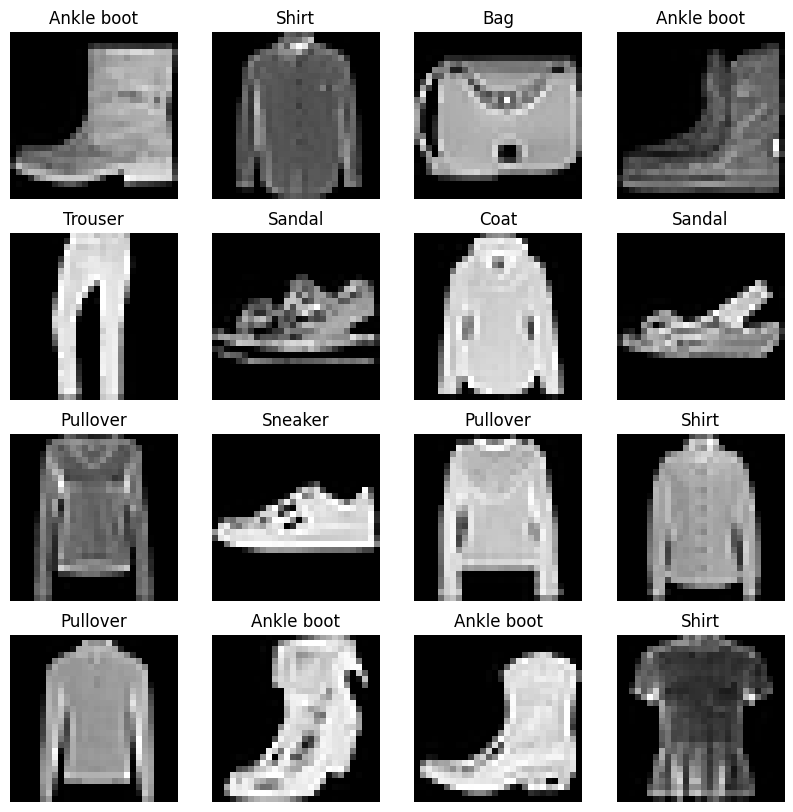

In [8]:
# Visualize random images

torch.manual_seed(42)
fig = plt.figure(figsize=(10, 10))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    sample_idx = torch.randint(0, len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])

In [9]:
# Create a dataloader
# DataLoader turns our dataset into a Python iterable

from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False) # generally don't shuffle test data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fbce290ed90>,
 <torch.utils.data.dataloader.DataLoader at 0x7fbcdc81d1d0>)

In [10]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Len of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE} images")
print(f"Len of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE} images")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fbce290ed90>, <torch.utils.data.dataloader.DataLoader object at 0x7fbcdc81d1d0>)
Len of train_dataloader: 1875 batches of 32 images
Len of test_dataloader: 313 batches of 32 images


In [11]:
train_features_batch, train_labels_batch = next(iter(train_dataloader)) # next iter is a function that returns the next item in an iterator
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

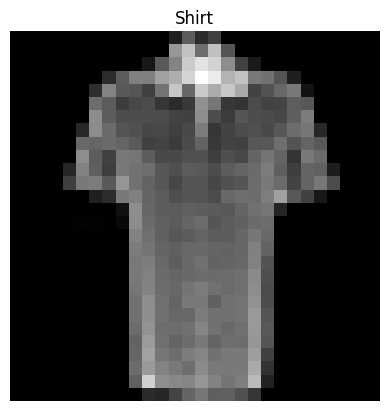

In [12]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=(1,)).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f'{class_names[label]}')
plt.axis('off')

In [13]:
# Start with a baseline model

flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"Print shape before flatten: {x.shape}")
print(f"Print shape after flatten: {output.shape}")

Print shape before flatten: torch.Size([1, 28, 28])
Print shape after flatten: torch.Size([1, 784])


In [14]:
class FashionMNISTV0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape))

    def forward(self, x):
        return self.layer_stack(x)

device = "cuda" if torch.cuda.is_available() else "cpu"
model_0 = FashionMNISTV0(input_shape=28*28, hidden_units=128, output_shape=len(class_names)).to(device)
print(model_0)

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [15]:
dummmy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummmy_x), model_0(dummmy_x).shape

(tensor([[-0.2287, -0.3510,  0.1494, -0.1733,  0.2300, -0.0905, -0.0509,  0.0421,
           0.0642,  0.0717]], device='cuda:0', grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

In [16]:
# Setup loss, optimizer, and evaluation metric
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)

In [17]:
# Create a function to time our experiments
from timeit import default_timer as timer

def print_train_time(start,
                     end,
                     device):
    
    total_time = end - start
    print(f'Training time on {device}: {total_time:.3f} seconds')
    return total_time

In [18]:
start = timer()
# some code...
end = timer()
print_train_time(start, end, device=device)

Training time on cuda: 0.000 seconds


2.6211142539978027e-05

In [19]:
ab_features, ab_labels = next(iter(train_dataloader))
ab_features.shape, ab_labels.shape, ab_features.device, ab_labels.device

(torch.Size([32, 1, 28, 28]),
 torch.Size([32]),
 device(type='cpu'),
 device(type='cpu'))

In [20]:
# Create a training loop

from tqdm.auto import tqdm # tqdm.auto to automatically choose tqdm.notebook or tqdm depending on the environment

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 3

train_time_start_on = timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch+1} \n----------")
    # Training
    train_loss = 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # move data to device
        X, y = X.to(device), y.to(device)

        # forward pass
        y_pred = model_0(X)

        # loss calculation (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # zero gradients
        optimizer.zero_grad()

        # backward pass
        loss.backward()

        # update weights 
        optimizer.step() # NOTE: updating weights for every batch, so model is learning from every batch

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # NOTE: now we are in epoch loop
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    # Testing
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:

            # move data to device
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            test_pred = model_0(X_test)
            
            test_loss += loss_fn(test_pred, y_test)

            # accuracy
            test_acc += accuracy_fn(y_true=y_test, 
                                    y_pred=test_pred.argmax(dim=1)) # argmax to get index of highest value instead of logits
        
        # calculate the test loss average per batch
        test_loss /= len(test_dataloader) # Will get loss epoch-wise

        # calculate the test accuracy average per batch
        test_acc /= len(test_dataloader) # Will get accuracy epoch-wise

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}\n")

# calculate training time
train_time_end_on = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on, end=train_time_end_on, device=device)

/home/kpatel2s/miniconda3/envs/pytorch_practice/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1 
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:04<00:08,  4.46s/it]


Train loss: 1.6921 | Test loss: 1.2696 | Test accuracy: 64.4169

Epoch 2 
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:09<00:04,  4.54s/it]


Train loss: 1.0790 | Test loss: 0.9662 | Test accuracy: 67.3722

Epoch 3 
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:13<00:00,  4.53s/it]


Train loss: 0.8863 | Test loss: 0.8470 | Test accuracy: 69.9081

Training time on cuda: 13.580 seconds


In [21]:
# Make prediction and visualize the result

torch.manual_seed(42)

def eval_model(model,
               dataloader,
               loss_fn,
               accuracy_fn):
    """
    Evaluate the model on the given data_loader with the given loss function
    """

    loss, acc = 0, 0

    with torch.inference_mode():
        for X, y in tqdm(dataloader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(dataloader)
        acc /= len(dataloader)

    return {"model_name" : model.__class__.__name__,
            "model_loss" : loss.item(),
            "model_acc" : acc}

# Calculate model 0 results on test data
model_0_results = eval_model(model=model_0,
                            dataloader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
print(model_0_results)


100%|██████████| 313/313 [00:00<00:00, 591.02it/s]

{'model_name': 'FashionMNISTV0', 'model_loss': 0.8469741344451904, 'model_acc': 69.90814696485623}


### Create a function for trainign and evaluation

In [22]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer, 
               accuracy_fn,
               device: torch.device = device):

    train_loss, train_acc = 0, 0    

    # Put model in training mode
    model.train()
    
    for batch, (X, y) in enumerate(dataloader):
        
        # move data to device
        X, y = X.to(device), y.to(device)

        # forward pass
        y_pred = model(X)

        # loss calculation (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        # zero gradients
        optimizer.zero_grad()

        # backward pass
        loss.backward()

        # update weights 
        optimizer.step() # NOTE: updating weights for every batch, so model is learning from every batch

    # NOTE: now we are in epoch loop
    # Divide total train loss by length of dataloader
    train_loss /= len(dataloader)

    # Divide total train accuracy by length of dataloader
    train_acc /= len(dataloader)

    # Print
    print(f"Train loss: {train_loss:.4f}, Train acc: {train_acc:.4f}")

In [23]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    
    test_loss, test_acc = 0, 0

    model.eval()

    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, 
                                    y_pred=test_pred.argmax(dim=1)) # go from logits to prediction labels
            
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)

        print(f"Test loss: {test_loss:.5f}, Test acc: {test_acc:.3f}")

### Model 2: Building a Convolutional Neural Network (CNN) for Image Classification

Have look at the CNN Explainer: https://poloclub.github.io/cnn-explainer/

In [24]:
class FashionMNISTV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        """
        Creating a TinyVGG model for FashionMNIST dataset
        """
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # flatten to single vector
            nn.Linear(in_features=hidden_units*7*7, # get this 7x7 by running a dummy input through the model, and printing the shape in the forward pass
                      out_features=output_shape)
        )

    def forward(self, x):
        """
        Forward pass of the model
        """
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


In [25]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = FashionMNISTV2(input_shape=1,
                         hidden_units=10,
                         output_shape=10).to(device)
print(model_2)

FashionMNISTV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


In [26]:
# Create a dummy tensor and pass it through a convolutional layer
iamge = torch.randn(size=(1, 28, 28))
print(f" Image shape: {image.shape}")
model_2(image.unsqueeze(0).to(device))

 Image shape: torch.Size([1, 28, 28])


tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

#### Stepping through nn.Conv2d() and nn.MaxPool2d() in PyTorch

In [27]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [28]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
output = conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 
print(output.shape) # because we have 10 filters, we get 10 feature maps

torch.Size([10, 62, 62])


#### Train the model

In [29]:
# loss and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 3

from timeit import default_timer as timer
train_time_start_model_2 = timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n-------------------------------")
    train_step(model=model_2, 
               dataloader=train_dataloader, 
               loss_fn=loss_fn, 
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-------------------------------
Train loss: 0.5955, Train acc: 78.4783


 33%|███▎      | 1/3 [00:05<00:11,  5.77s/it]

Test loss: 0.40305, Test acc: 86.032
Epoch 1
-------------------------------
Train loss: 0.3636, Train acc: 86.9900


 67%|██████▋   | 2/3 [00:11<00:05,  5.60s/it]

Test loss: 0.36426, Test acc: 86.492
Epoch 2
-------------------------------
Train loss: 0.3281, Train acc: 88.1050


100%|██████████| 3/3 [00:16<00:00,  5.58s/it]

Test loss: 0.32471, Test acc: 88.229
Training time on cuda: 16.733 seconds


In [31]:
model_2_results = eval_model(model=model_2,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
print(model_2_results)

100%|██████████| 313/313 [00:00<00:00, 524.08it/s]

{'model_name': 'FashionMNISTV2', 'model_loss': 0.324713796377182, 'model_acc': 88.22883386581469}


In [32]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.8469741344451904,
 'model_acc': 69.90814696485623}

In [33]:
# Compare results

import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTV0,0.846974,69.908147
1,FashionMNISTV2,0.324714,88.228834


In [34]:
# Add training time
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTV0,0.846974,69.908147,13.579824
1,FashionMNISTV2,0.324714,88.228834,16.733019


Text(0, 0.5, 'Model')

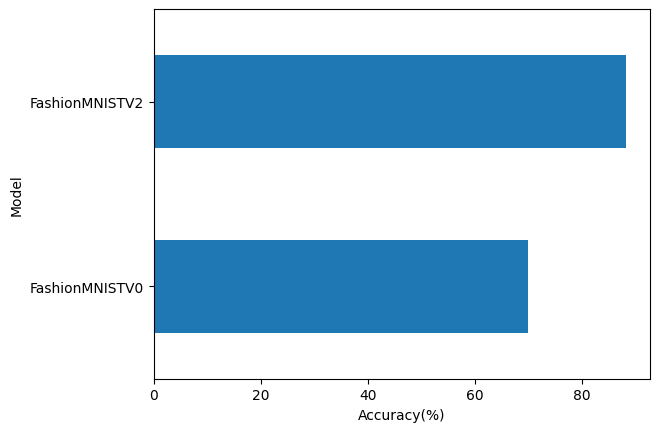

In [36]:
# Visualize model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy(%)")
plt.ylabel("Model")

In [37]:
# Make and evaluate random predictions with best model

def make_predictions(model,
                     data,
                     device):
    
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample
            sample = torch.unsqueeze(sample, 0).to(device)
            # make a prediction
            pred_logits = model(sample)

            # convert to probabilities
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn the list into a tensor
    return torch.stack(pred_probs)

In [38]:
import random
random.seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ground Truth: Sandal')

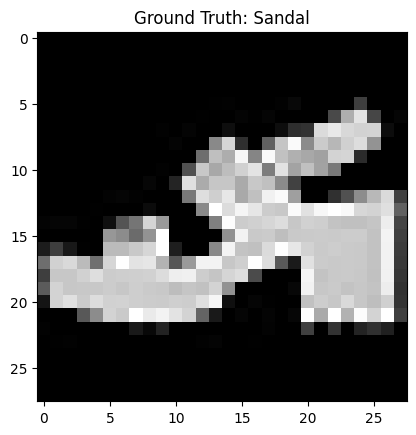

In [42]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title('Ground Truth: {}'.format(class_names[test_labels[0]]))

In [44]:
# Make predictions

pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device=device)

pred_probs[:10]

tensor([[1.1038e-07, 1.1643e-08, 2.9363e-08, 1.3718e-08, 2.8897e-09, 9.9991e-01,
         9.3083e-08, 1.7578e-06, 4.4648e-06, 8.2078e-05],
        [2.8873e-02, 7.9189e-01, 1.1108e-04, 2.8918e-02, 1.2278e-01, 3.9743e-05,
         2.7231e-02, 7.2791e-05, 5.5459e-05, 3.1034e-05],
        [6.6408e-06, 2.8920e-07, 5.5187e-06, 1.6500e-06, 5.5680e-07, 7.3302e-04,
         3.2355e-06, 9.2612e-01, 5.1472e-04, 7.2615e-02],
        [9.7954e-04, 1.0038e-04, 2.2827e-01, 1.0226e-03, 7.6646e-01, 3.1536e-07,
         3.1422e-03, 2.1857e-06, 1.9639e-05, 1.0034e-05],
        [3.9616e-02, 2.6829e-06, 1.1938e-04, 9.5378e-01, 1.4410e-04, 2.6667e-08,
         6.3277e-03, 1.0206e-06, 9.0972e-06, 2.4176e-06],
        [6.0663e-01, 2.3079e-05, 8.7090e-04, 5.2872e-03, 3.0194e-03, 5.6353e-08,
         3.8399e-01, 1.4493e-07, 1.8171e-04, 1.5889e-07],
        [1.7938e-04, 1.5422e-05, 2.7079e-02, 4.2206e-06, 9.4754e-01, 2.2094e-07,
         2.5104e-02, 9.8755e-08, 7.3448e-05, 6.9501e-06],
        [1.7065e-06, 2.8770

In [45]:
# Convert prediction probabilities to labels
preds = torch.argmax(pred_probs, dim=1)
print(preds)

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])


In [46]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

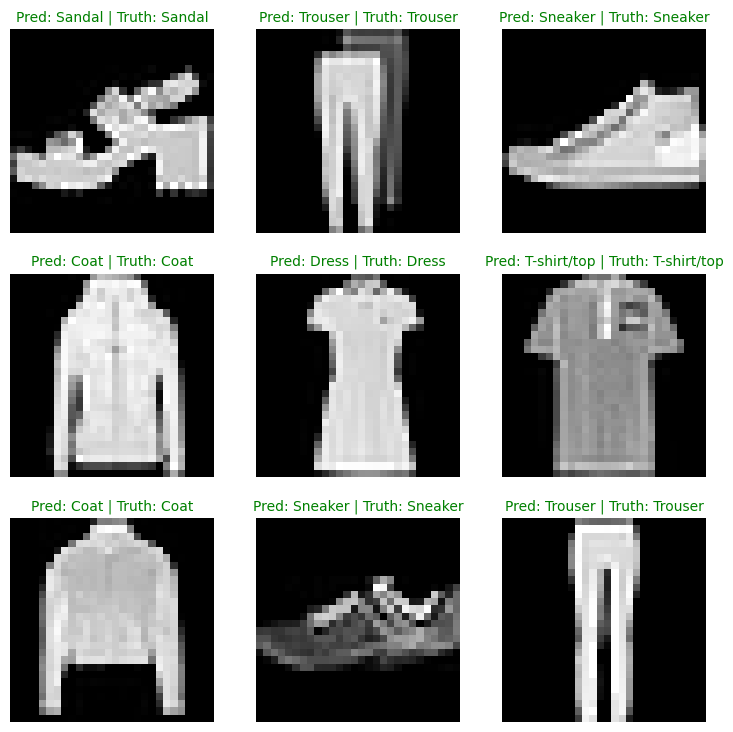

In [47]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[preds[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [48]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:00<00:00, 510.81it/s]


In [49]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


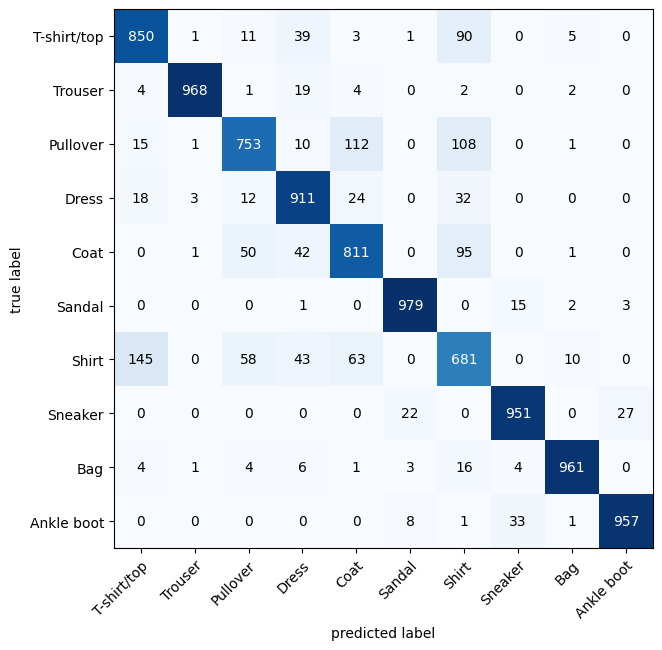

In [50]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

#### Saving and Loading Models is same as before